In [423]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

#choosing matplotlib style
import matplotlib.pyplot as plt
import matplotlib
from collections import OrderedDict
from matplotlib.transforms import blended_transform_factory
print(plt.style.available)
plt.style.use('ggplot')

#import seaborn as sns

#table dump out style for easy data frame viewing
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))


['seaborn-dark', 'seaborn-muted', 'seaborn-white', 'bmh', 'seaborn-notebook', 'classic', 'grayscale', 'seaborn-deep', 'seaborn-darkgrid', 'seaborn-dark-palette', 'seaborn-bright', 'dark_background', 'seaborn-poster', 'ggplot', 'seaborn-paper', 'fivethirtyeight', 'seaborn-talk', 'seaborn-pastel', 'seaborn-colorblind', 'seaborn-whitegrid', 'seaborn-ticks']


In [616]:
t = pd.DataFrame.from_csv('data/1-drug-alcohol-raw.csv', index_col=None)
t.head()

,State,State Code,2013 Urbanization,2013 Urbanization Code,Ten-Year Age Groups,Age Group Midpoint,Drug/Alcohol Induced Causes,Drug/Alcohol Induced Causes Code,Deaths,Population,Crude Rate,% of Total Deaths
0,Massachusetts,25,NonCore (non-metro),6,< 1 year,0.5,Drug-Induced Causes,D,0,2291,0.0,0.00%
1,Massachusetts,25,NonCore (non-metro),6,< 1 year,0.5,Alcohol-Induced Causes,A,0,2291,0.0,0.00%
2,Nevada,32,NonCore (non-metro),6,< 1 year,0.5,Drug-Induced Causes,D,0,6380,0.0,0.00%
3,Nevada,32,NonCore (non-metro),6,< 1 year,0.5,Alcohol-Induced Causes,A,0,6380,0.0,0.00%
4,New Hampshire,33,NonCore (non-metro),6,< 1 year,0.5,Drug-Induced Causes,D,0,6472,0.0,0.00%


In [618]:
#By State, Separate Columns for Alcohol/Drugs/All other causes
h1 = t.groupby(['State', 'Drug/Alcohol Induced Causes'])['Deaths','Population'].sum().reset_index()
h1['Death Rate'] = (h1['Deaths'] * 100000 / h1['Population'])
pop = h1.groupby(['State'])['Population'].sum().reset_index()
pop['Population'] = pop['Population']/51000000
h1 = h1.pivot(index='State', columns='Drug/Alcohol Induced Causes')['Death Rate'].reset_index()
h1 = pd.merge(left=h1, right=pop, how='left', left_on='State', right_on='State')
h1 = h1.sort_values(by=['State'])
h1.head(5)
#pop.head(50)

,State,Alcohol-Induced Causes,All Other Causes,Drug-Induced Causes,Population
0,Alabama,5.419847,1005.308279,10.418992,4.656090
1,Alaska,18.271711,473.842363,13.658599,0.683474
2,Arizona,13.046116,734.937070,15.570067,6.015313
3,Arkansas,5.834546,1004.283675,10.355903,2.831008
4,California,11.161197,632.086092,10.607260,36.381297


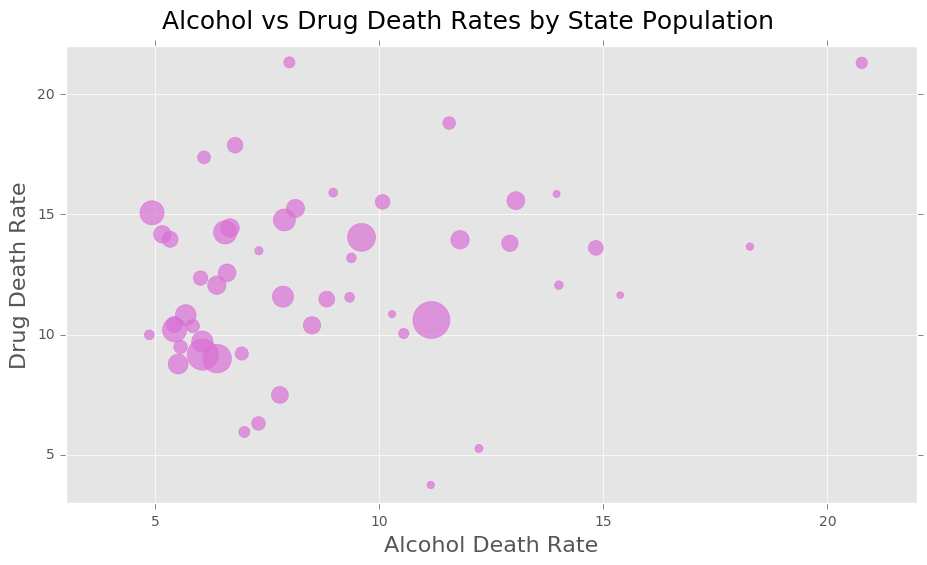

In [622]:
N = 100
x = h1['Alcohol-Induced Causes']
y = h1['Drug-Induced Causes']
size = (h1['Population'] * 100) ** 0.8 # scaling size of bubbles 
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y, alpha=0.7, color='orchid', s=size)
ax.set_xlabel('Alcohol Death Rate', fontsize=16)
ax.set_ylabel('Drug Death Rate', fontsize=16)
fig.suptitle('Alcohol vs Drug Death Rates by State Population', fontsize=18)
fig.tight_layout(pad=3);
ax.set_xlim((3, 22)) 
ax.set_ylim((3, 22)) 
ax.grid(True) 
fig.savefig('chart3.png', dpi=250) 

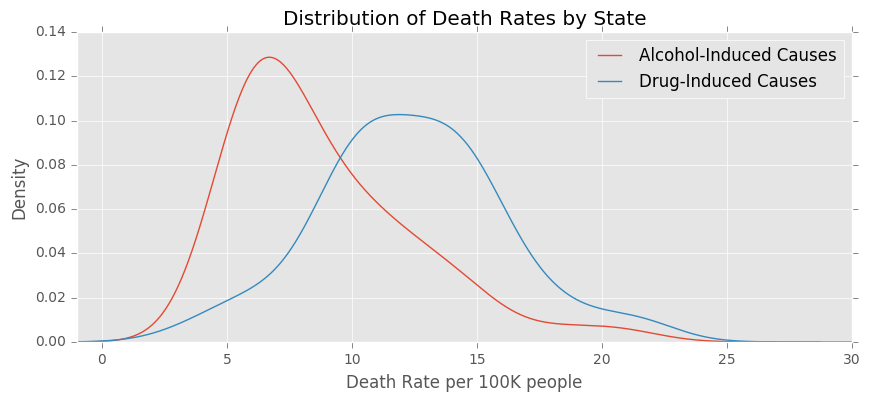

In [621]:
h2 = h1.drop('All Other Causes', axis=1)
h2 = h2.drop('Population', axis=1)
ax = h2.plot.kde()
fig = ax.figure
fig.set_size_inches(10,4)
ax.set_title('Distribution of Death Rates by State')
ax.set_xlabel('Death Rate per 100K people')
ax.set_xlim((-1,30))
fig.savefig('chart1.png', dpi=250) 

In [626]:
#By Urbanization for just Alcohol deaths
t1 = t.groupby(['Ten-Year Age Groups', 'Age Group Midpoint', '2013 Urbanization','Drug/Alcohol Induced Causes'])['Deaths','Population'].sum().reset_index()
t1 = t1.sort_values(by=['Age Group Midpoint','2013 Urbanization','Drug/Alcohol Induced Causes'])
t1['Death Rate'] = (t1['Deaths'] * 100000 / t1['Population'])
t1 = t1.drop(['Ten-Year Age Groups','Deaths','Population'], axis=1)
t1 = t1.set_index(['Age Group Midpoint', '2013 Urbanization'])
t1 = t1.pivot(columns='Drug/Alcohol Induced Causes').reset_index()
t1.columns = ['_'.join(col).strip() for col in t1.columns.values]  #flatten the 2 tier column index
t1 = t1.drop(['Death Rate_All Other Causes','Death Rate_Drug-Induced Causes'], axis=1)
t1 = t1.set_index(['Age Group Midpoint_','2013 Urbanization_'])
t1 = t1.unstack('2013 Urbanization_').reset_index()
t1.columns = [' '.join(col).strip() for col in t1.columns.values]
t1 = t1.set_index(['Age Group Midpoint_'])
t1.rename(columns={'Death Rate_Alcohol-Induced Causes Large Central Metro':'Large Central Metro',
                        'Death Rate_Alcohol-Induced Causes Large Fringe Metro':'Large Fringe Metro',
                        'Death Rate_Alcohol-Induced Causes Medium Metro':'Medium Metro',
                        'Death Rate_Alcohol-Induced Causes Micropolitan (non-metro)':'Micropolitan (non-metro)',
                        'Death Rate_Alcohol-Induced Causes NonCore (non-metro)':'NonCore (non-metro)',
                        'Death Rate_Alcohol-Induced Causes Small Metro':'Small Metro'}, inplace=True)
t1.head()

,Large Central Metro,Large Fringe Metro,Medium Metro,Micropolitan (non-metro),NonCore (non-metro),Small Metro
Age Group Midpoint_,,,,,,
0.5,0.027142,0.012610,0.014181,0.000000,0.000000,0.000000
2.5,0.033923,0.029042,0.033848,0.013175,0.006448,0.012516
9.0,0.029505,0.031758,0.034475,0.039840,0.042328,0.040477
19.0,0.277612,0.250745,0.263642,0.212498,0.265007,0.216223
29.0,1.903378,1.645756,2.074027,2.372727,2.327658,2.159895


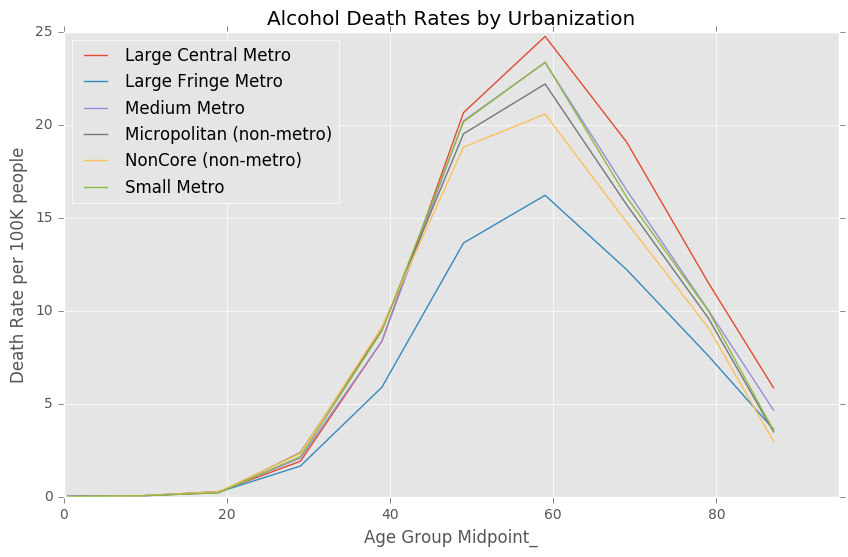

In [627]:
ax = t1.plot()
fig = ax.figure
fig.set_size_inches(10,6)
ax.set_xlim((0,95)) 
ax.set_title('Alcohol Death Rates by Urbanization')
ax.set_ylabel('Death Rate per 100K people')
fig.savefig('chart5.png', dpi=250)

In [628]:
#By Urbanization for just Drug deaths
t2 = t.groupby(['Ten-Year Age Groups', 'Age Group Midpoint', '2013 Urbanization','Drug/Alcohol Induced Causes'])['Deaths','Population'].sum().reset_index()
t2 = t2.sort_values(by=['Age Group Midpoint','2013 Urbanization','Drug/Alcohol Induced Causes'])
t2['Death Rate'] = (t2['Deaths'] * 100000 / t2['Population'])
t2 = t2.drop(['Ten-Year Age Groups','Deaths','Population'], axis=1)
t2 = t2.set_index(['Age Group Midpoint', '2013 Urbanization'])
t2 = t2.pivot(columns='Drug/Alcohol Induced Causes').reset_index()
t2.columns = ['_'.join(col).strip() for col in t2.columns.values]  #flatten the 2 tier column index
t2 = t2.drop(['Death Rate_All Other Causes','Death Rate_Alcohol-Induced Causes'], axis=1)
t2 = t2.set_index(['Age Group Midpoint_','2013 Urbanization_'])
t2 = t2.unstack('2013 Urbanization_').reset_index()
t2.columns = [' '.join(col).strip() for col in t2.columns.values]
t2 = t2.set_index(['Age Group Midpoint_'])
t2.rename(columns={'Death Rate_Drug-Induced Causes Large Central Metro':'Large Central Metro',
                        'Death Rate_Drug-Induced Causes Large Fringe Metro':'Large Fringe Metro',
                        'Death Rate_Drug-Induced Causes Medium Metro':'Medium Metro',
                        'Death Rate_Drug-Induced Causes Micropolitan (non-metro)':'Micropolitan (non-metro)',
                        'Death Rate_Drug-Induced Causes NonCore (non-metro)':'NonCore (non-metro)',
                        'Death Rate_Drug-Induced Causes Small Metro':'Small Metro'}, inplace=True)
t2.head()

,Large Central Metro,Large Fringe Metro,Medium Metro,Micropolitan (non-metro),NonCore (non-metro),Small Metro
Age Group Midpoint_,,,,,,
0.5,0.411657,0.012610,0.106361,0.000000,0.000000,0.000000
2.5,0.145049,0.081012,0.055225,0.013175,0.006448,0.012516
9.0,0.075189,0.063517,0.074465,0.054780,0.042328,0.040477
19.0,6.387772,9.339188,7.635330,6.859124,6.742948,6.453126
29.0,13.746213,18.587437,18.614252,18.644968,19.100816,17.645874


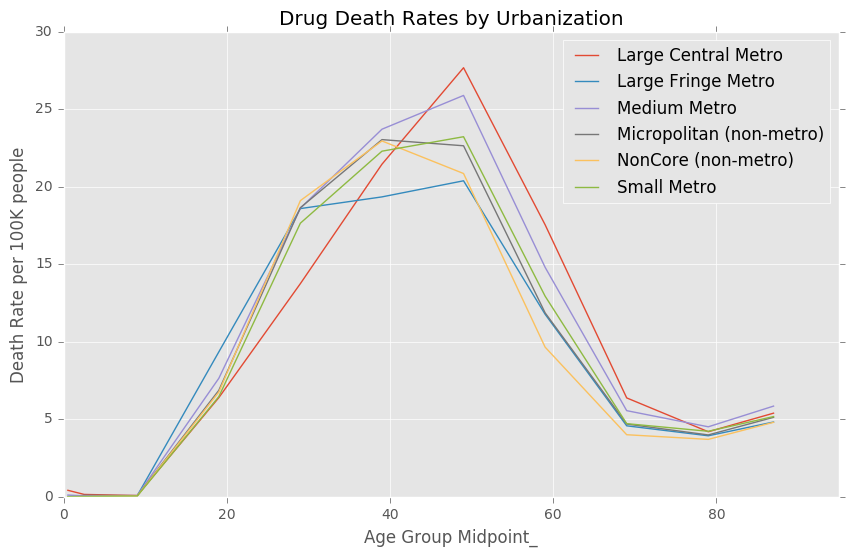

In [629]:
ax = t2.plot()
fig = ax.figure
fig.set_size_inches(10,6)
ax.set_xlim((0,95)) 
ax.set_title('Drug Death Rates by Urbanization')
ax.set_ylabel('Death Rate per 100K people')
fig.savefig('chart6.png', dpi=250)

In [631]:
#Separating out Age groups
t3 = t.groupby(['Age Group Midpoint', 'Drug/Alcohol Induced Causes'])['Deaths','Population'].sum().reset_index()
t3['Death Rate'] = (t3['Deaths'] * 100000 / t3['Population'])
t3 = t3.pivot(index='Age Group Midpoint', columns='Drug/Alcohol Induced Causes')['Death Rate'].reset_index()
t3.head(5)
#t1.plot()


Drug/Alcohol Induced Causes,Age Group Midpoint,Alcohol-Induced Causes,All Other Causes,Drug-Induced Causes
0,0.5,0.014785,665.212889,0.159673
1,2.5,0.027479,28.663687,0.079839
2,9.0,0.033763,14.976629,0.065227
3,19.0,0.255543,66.638189,7.391449
4,29.0,1.958369,87.148365,16.833540


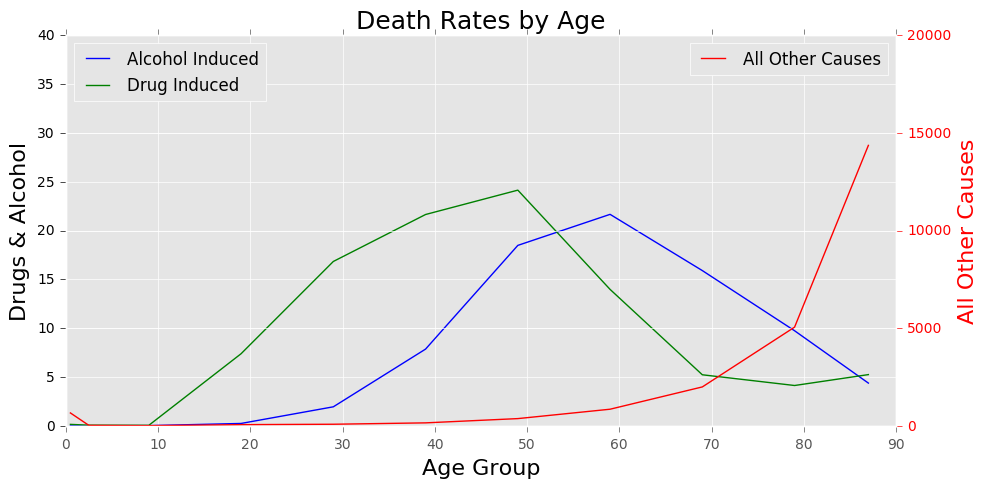

In [632]:
x = t3['Age Group Midpoint'].values
y1 = t3['Alcohol-Induced Causes'].values
y2 = t3['Drug-Induced Causes'].values
y3 = t3['All Other Causes'].values

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(x, y1, color='b', label='Alcohol Induced')
ax1.plot(x, y2, color='g', label='Drug Induced')
ax2 = ax1.twinx()
ax2.plot(x, y3, color='r', label='All Other Causes')

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_title('Death Rates by Age', fontsize=18)
ax1.set_xlabel('Age Group', color='black', fontsize=16)
ax1.set_ylabel('Drugs & Alcohol', color='black', fontsize=16)
ax2.set_ylabel('All Other Causes', color='r', fontsize=16)
ax1.tick_params('y', colors='black')
ax2.tick_params('y', colors='r')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_ylim(0,40) 
ax2.set_ylim(0,20000) 

fig.tight_layout()
fig.savefig('chart4.png', dpi=250)
plt.show()

In [633]:
#New data set where deaths are now catogorized by Injury Intent
s = pd.DataFrame.from_csv('data/2-all states intent-mechanism-raw.csv', index_col=None)
s.head()

,State,State Code,2013 Urbanization,2013 Urbanization Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Injury Intent,Injury Intent Code,Injury Mechanism & All Other Leading Causes,Injury Mechanism & All Other Leading Causes Code,Deaths,Population,Crude Rate,% of Total Deaths
0,Alabama,1.0,Small Metro,4.0,< 1 year,0.5,Homicide,3.0,Unspecified Injury,GRINJ-020,10.0,243487.0,4.106995,0.00%
1,Alaska,2.0,Small Metro,4.0,< 1 year,0.5,Unintentional,1.0,Suffocation,GRINJ-017,10.0,26105.0,38.306838,0.00%
2,Arizona,4.0,Large Central Metro,1.0,< 1 year,0.5,Undetermined,4.0,Unspecified Injury,GRINJ-020,10.0,941477.0,1.062161,0.00%
3,Arizona,4.0,Large Fringe Metro,2.0,< 1 year,0.5,"Non-Injury, no intent classified",9.0,Non-Injury: Diseases of Heart,GR113 055-068,10.0,70759.0,14.132478,0.00%
4,Arizona,4.0,Micropolitan (non-metro),5.0,< 1 year,0.5,"Non-Injury, no intent classified",9.0,Non-Injury: Influenza & Pneumonia,GR113 077-078,10.0,60966.0,16.402585,0.00%


In [634]:
#By State, Separate Columns for Injury Intent
s1 = s.groupby(['State', 'Injury Intent'])['Deaths','Population'].sum().reset_index()
s1['Death Rate'] = (s1['Deaths'] * 100000 / s1['Population'])
pop = s1.groupby(['State'])['Population'].sum().reset_index()
pop['Population'] = pop['Population']/330000000
s1 = s1.pivot(index='State', columns='Injury Intent')['Death Rate'].reset_index()
s1 = pd.merge(left=s1, right=pop, how='left', left_on='State', right_on='State')
s1 = s1.sort_values(by=['State'])
s1.head(5)

,State,Homicide,Legal Intervention / Operations of War,"Non-Injury, no intent classified",Suicide,Undetermined,Unintentional,Population
0,Alabama,3.824447,NaN,49.271158,5.486940,1.011215,5.506074,7.916304
1,Alaska,3.589857,NaN,44.080784,10.659149,1.388959,8.260665,0.613791
2,Arizona,2.150350,0.366529,31.279809,4.055270,0.923057,4.483233,12.829058
3,Arkansas,2.865975,0.453763,51.427269,6.302845,3.354929,5.137113,4.755760
4,California,0.843973,0.239233,19.796488,1.239611,0.152355,1.865404,123.918227


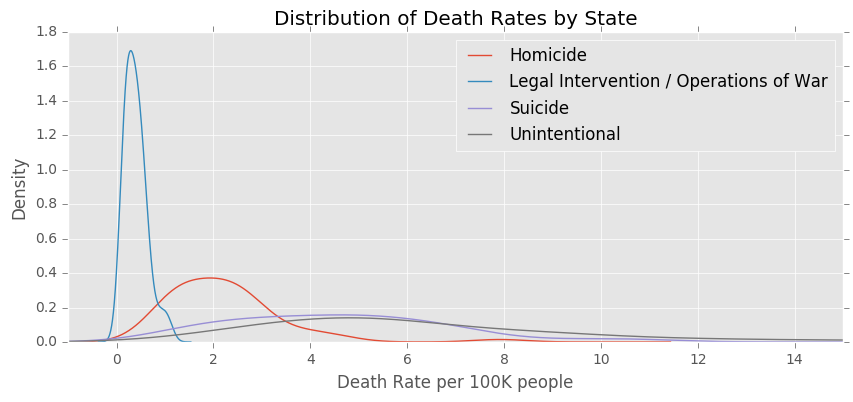

In [636]:
#By State, Separate Columns for Injury Intent
s2 = s1.drop(s1.columns[[3,5,7]], axis=1)
ax = s2.plot.kde()
fig = ax.figure
fig.set_size_inches(10,4)
ax.set_title('Distribution of Death Rates by State')
ax.set_xlabel('Death Rate per 100K people')
ax.set_xlim((-1,15)) 
fig.savefig('chart2.png', dpi=250) 

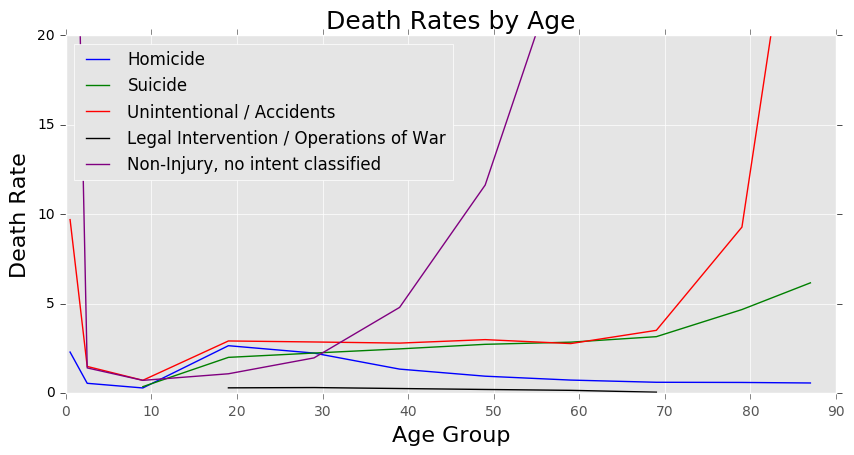

In [646]:
#By Age, Separate Columns for Injury Intent
s3 = s.groupby(['Injury Intent', 'Ten-Year Age Groups Code'])['Deaths','Population'].sum().reset_index()
s3['Death Rate'] = (s3['Deaths'] * 100000 / s3['Population'])
s3 = s3.pivot(index='Ten-Year Age Groups Code', columns='Injury Intent')['Death Rate'].reset_index()

x = s3['Ten-Year Age Groups Code'].values
y1 = s3['Homicide'].values
y2 = s3['Suicide'].values
y3 = s3['Unintentional'].values
y4 = s3['Legal Intervention / Operations of War'].values
y5 = s3['Non-Injury, no intent classified'].values

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(x, y1, color='b', label='Homicide')
ax1.plot(x, y2, color='g', label='Suicide')
ax1.plot(x, y3, color='r', label='Unintentional / Accidents')
ax1.plot(x, y4, color='black', label='Legal Intervention / Operations of War')
ax1.plot(x, y5, color='purple', label='Non-Injury, no intent classified')

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_title('Death Rates by Age', fontsize=18)
ax1.set_xlabel('Age Group', color='black', fontsize=16)
ax1.set_ylabel('Death Rate', color='black', fontsize=16)
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper left')
ax1.set_ylim(0,20) 

fig.savefig('chart7.png', dpi=250) 
fig.tight_layout()
plt.show()
#h2.head(100)

In [519]:
s.head(1)

,State,State Code,2013 Urbanization,2013 Urbanization Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Injury Intent,Injury Intent Code,Injury Mechanism & All Other Leading Causes,Injury Mechanism & All Other Leading Causes Code,Deaths,Population,Crude Rate,% of Total Deaths
0,Alabama,1.0,Small Metro,4.0,< 1 year,0.5,Homicide,3.0,Unspecified Injury,GRINJ-020,10.0,243487.0,4.106995,0.00%


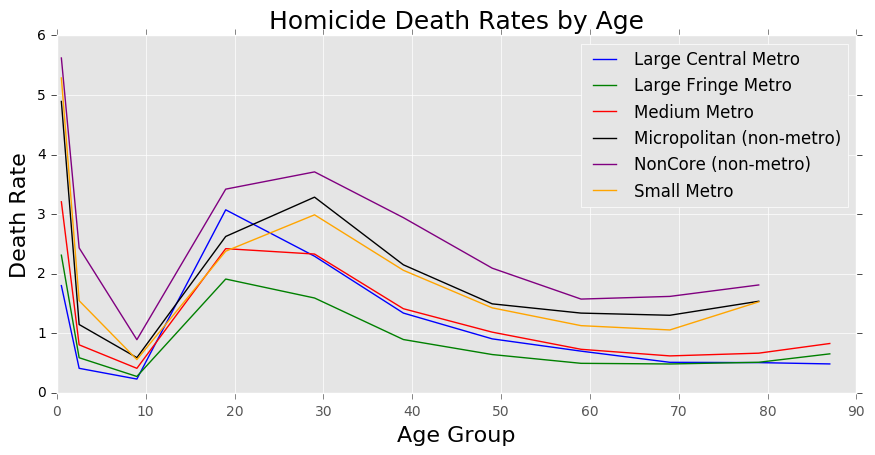

2013 Urbanization,Ten-Year Age Groups Code,Large Central Metro,Large Fringe Metro,Medium Metro,Micropolitan (non-metro),NonCore (non-metro),Small Metro
0,0.5,1.801217,2.312240,3.207856,4.892193,5.621356,5.286076
1,2.5,0.413366,0.591112,0.807341,1.148511,2.434363,1.548240
2,9.0,0.233056,0.276329,0.413124,0.592250,0.893837,0.559990
3,19.0,3.073515,1.911719,2.421686,2.626333,3.420422,2.379254
4,29.0,2.294606,1.593323,2.330971,3.286004,3.709983,2.989569


In [645]:
# Group and plot by Age & Urbanization:  First plot is just for Homicides but code is setup for other causes as well
s4 = s.groupby(['Ten-Year Age Groups Code', '2013 Urbanization', 'Injury Intent'])['Deaths','Population'].sum().reset_index()
s4['Death Rate'] = (s4['Deaths'] * 100000 / s4['Population'])
s4.drop(s4.columns[[3,4]], axis=1, inplace=True)
s4 = s4.set_index(['Ten-Year Age Groups Code', '2013 Urbanization'])
s4 = s4.pivot(columns='Injury Intent')['Death Rate'].reset_index()
s4.drop(s4.columns[[4,6]], axis=1, inplace=True)
Homicide = s4.drop(h4.columns[[3,4,5]], axis=1)
Suicide = s4.drop(h4.columns[[2,3,5]], axis=1)
War = s4.drop(s4.columns[[2,4,5]], axis=1)
Accident = s4.drop(s4.columns[[2,3,4]], axis=1)
Homicide = Homicide.pivot(index='Ten-Year Age Groups Code', columns='2013 Urbanization', values='Homicide').reset_index()
Suicide = Suicide.pivot(index='Ten-Year Age Groups Code', columns='2013 Urbanization', values='Suicide').reset_index()
War = War.pivot(index='Ten-Year Age Groups Code', columns='2013 Urbanization', values='Legal Intervention / Operations of War').reset_index()
Accident = Accident.pivot(index='Ten-Year Age Groups Code', columns='2013 Urbanization', values='Unintentional').reset_index()

x = Homicide['Ten-Year Age Groups Code'].values
y1 = Homicide['Large Central Metro'].values
y2 = Homicide['Large Fringe Metro'].values
y3 = Homicide['Medium Metro'].values
y4 = Homicide['Micropolitan (non-metro)'].values
y5 = Homicide['NonCore (non-metro)'].values
y6 = Homicide['Small Metro'].values

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(x, y1, color='b', label='Large Central Metro')
ax1.plot(x, y2, color='g', label='Large Fringe Metro')
ax1.plot(x, y3, color='r', label='Medium Metro')
ax1.plot(x, y4, color='black', label='Micropolitan (non-metro)')
ax1.plot(x, y5, color='purple', label='NonCore (non-metro)')
ax1.plot(x, y6, color='orange', label='Small Metro')

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_title('Homicide Death Rates by Age', fontsize=18)
ax1.set_xlabel('Age Group', color='black', fontsize=16)
ax1.set_ylabel('Death Rate', color='black', fontsize=16)
ax1.tick_params('y', colors='black')
ax1.legend(loc='upper right')
ax1.set_ylim(0,6) 


fig.savefig('chart8.png', dpi=250) 
fig.tight_layout()
plt.show()

#s4.head()
Homicide.head()

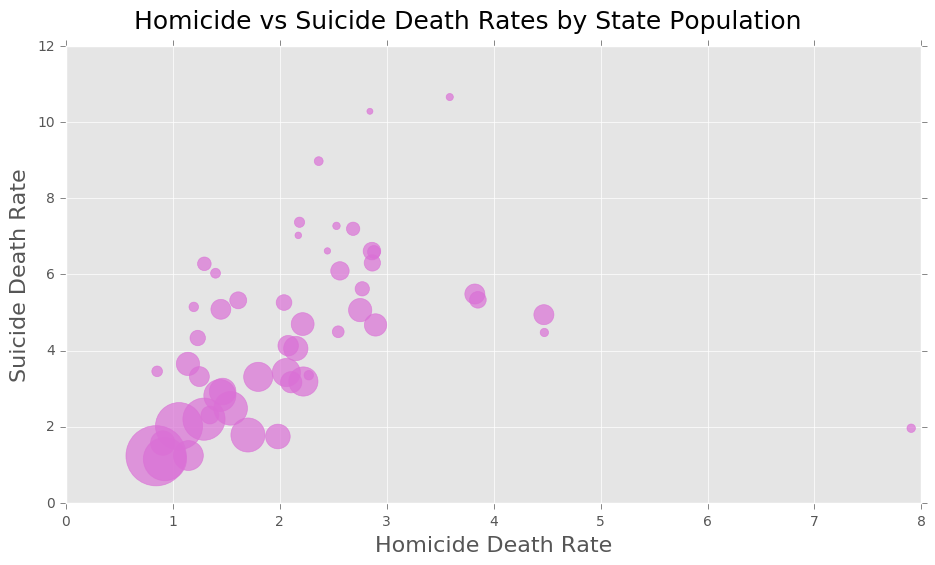

In [644]:
s5 = s1.drop(s1.columns[[3,5]], axis=1)
x = s5['Homicide']
y = s5['Suicide']
size = (s5['Population'] * 100) ** 0.8 #extra scaling factors for circle sizes
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y, alpha=0.7, color='orchid', s=size)  #s=size, c=colours) 
ax.set_xlabel('Homicide Death Rate', fontsize=16)
ax.set_ylabel('Suicide Death Rate', fontsize=16)
fig.suptitle('Homicide vs Suicide Death Rates by State Population', fontsize=18)
fig.tight_layout(pad=3);
ax.set_xlim((0, 8)) 
ax.set_ylim((0, 12)) 
ax.grid(True)
fig.savefig('chart9.png', dpi=250) 